# code review
- PEP8 compliance - spaces around operators FIXED
- dont use list use arrays when size is predetermined FIXED
- moved lines that do not depend on ff out of the ffs loop FIXED
- your fist savefig statement returned an error cause fig is not defined FIXED
- put counter so user knows how long its gonna be FIXED
- plot the firse derived product first, leff first then r which depends on leff FIXED

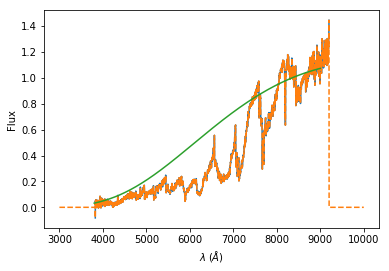

In [1]:
%matplotlib inline

import numpy as np
from utils import *
import matplotlib.pyplot as plt
from mdwarf_interp import mdwarf_interp
mdwarf_interp('m5.all.na.k.fits', plotit=True)
plt.plot(WAVELENGTH, make_bb(WAVELENGTH, 2800, normed=1.6e22))

/Users/fbb/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/fbb/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/fbb/Flarubin/utils.py:115: RuntimeWarning: invalid value encountered in double_scalars
  w_eff = np.exp(np.sum(sb * np.log(WAVELENGTH)) / np.sum(sb))


in R DCR should be 57.1 arcsec:  55.90109656158141


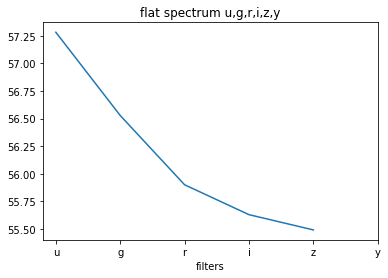

In [2]:

import numpy as np
from utils import *

filters = ['u', 'g', 'r', 'i', 'z', 'y']

#weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) for t in range(100,100000,1000)])
weff = np.array([lamb_eff(band=f, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = 1.4))
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("flat spectrum u,g,r,i,z,y");
print("in R DCR should be 57.1 arcsec: ", dcr_offset(weff[2], airmass = 1.4))

DCR in r should be 


/Users/fbb/Flarubin/utils.py:158: RuntimeWarning: invalid value encountered in true_divide
  w_eff = np.exp(np.sum((BBflux * sb * np.log(WAVELENGTH)) / np.sum(BBflux * sb)))


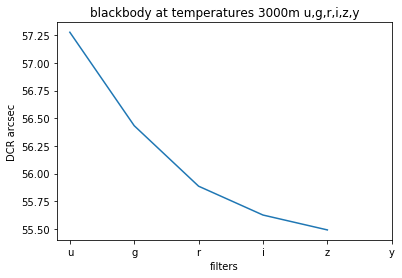

In [3]:
weff = np.array([lamb_eff_BB(band=f, temp=3000, verbose=False) for f in filters])
plt.plot(dcr_offset(weff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("blackbody at temperatures 3000m u,g,r,i,z,y");
print("DCR in r should be ")

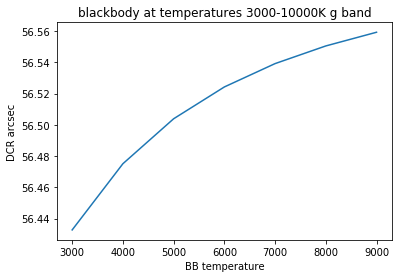

In [4]:
weff = np.array([lamb_eff_BB(band="g", temp=t, verbose=False) 
                 for t in range(3000,10000,1000)])
plt.plot(range(3000,10000,1000), dcr_offset(weff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K g band");

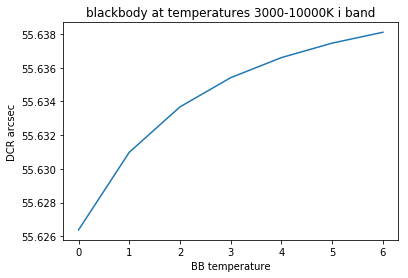

In [5]:
weff = np.array([lamb_eff_BB(band="i", temp=t, verbose=False) 
                 for t in range(3000,10000,1000)])
plt.plot(dcr_offset(weff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000K i band");

/Users/fbb/Flarubin/utils.py:202: RuntimeWarning: invalid value encountered in double_scalars
  w_eff = np.exp(np.sum((m_spec + ff * BBflux) * sb * np.log(WAVELENGTH)) / np.sum((m_spec + ff * BBflux) * sb))


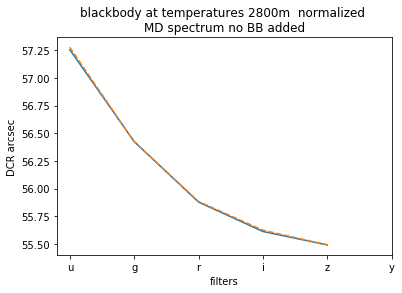

In [6]:
w_eff1 = np.array([md_lamb_eff(band=f, temp=3000, mdname='m5.all.na.k.fits', ff=0)  
                  for f in filters])
w_eff2 = np.array([lamb_eff_BB(band=f, temp=2800,)  
                  for f in filters])
plt.plot(dcr_offset(w_eff1, airmass = 1.4), label="BB")
plt.plot(dcr_offset(w_eff2, airmass = 1.4), '--', label="MD")
plt.ylabel("DCR arcsec")
plt.xlabel("filters")
plt.xticks(range(6), labels=["u","g","r","i","z","y"])
plt.title("blackbody at temperatures 2800m  normalized \nMD spectrum no BB added");

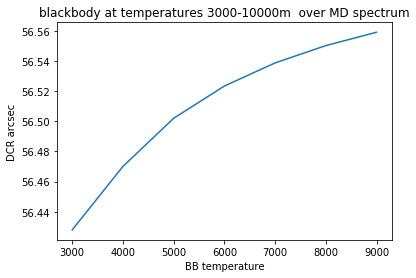

In [7]:
w_eff = np.array([md_lamb_eff(band='g', temp=t, mdname='m5.all.na.k.fits', ff=0.2)  
                   for t in range(3000,10000,1000)])
plt.plot(range(3000,10000,1000), dcr_offset(w_eff, airmass = 1.4))
plt.ylabel("DCR arcsec")
plt.xlabel("BB temperature")
plt.title("blackbody at temperatures 3000-10000m  over MD spectrum");